In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import ast
from matplotlib import pyplot as plt

# Standard

## Rectangle

In [2]:
epsnet_sample = pd.read_csv("./epsnet/standard/epsnet_sample_results_rectangle.csv")
epsnet_disc = pd.read_csv("./epsnet/standard/epsnet_discrepancy_results_rectangle.csv")
epsnet_sketch = pd.read_csv("./epsnet/standard/epsnet_sketch_merge_results_rectangle.csv")

In [3]:
epsnet_sample["size"] = epsnet_sample["red_points"] + epsnet_sample["blue_points"]
epsnet_disc["size"] = epsnet_disc["red_points"] + epsnet_disc["blue_points"]
epsnet_sketch["size"] = epsnet_sketch["red_points"] + epsnet_sketch["blue_points"]

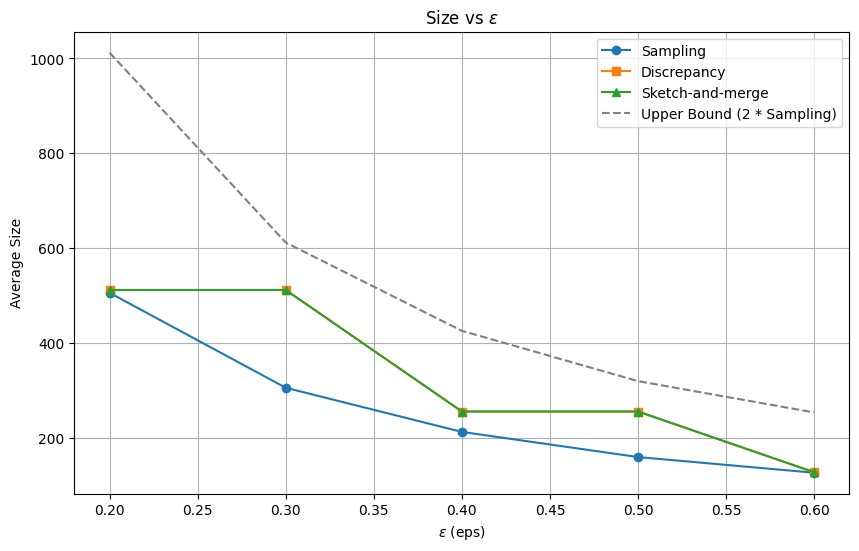

In [4]:
# Group by 'eps' and calculate the mean running time for each method
sample_grouped = epsnet_sample.groupby("eps")["size"].mean()
disc_grouped = epsnet_disc.groupby("eps")["size"].mean()
sketch_grouped = epsnet_sketch.groupby("eps")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_grouped.index, sample_grouped.values, label="Sampling", marker='o')
plt.plot(disc_grouped.index, disc_grouped.values, label="Discrepancy", marker='s')
plt.plot(sketch_grouped.index, sketch_grouped.values, label="Sketch-and-merge", marker='^')

# Add the upper bound line
plt.plot(sample_grouped.index, 2 * sample_grouped.values, label="Upper Bound (2 * Sampling)", linestyle='--', color='gray')

plt.xlabel("$\epsilon$ (eps)")
plt.ylabel("Average Size")
plt.title("Size vs $\epsilon$")
plt.legend()
plt.grid(True)
plt.show()


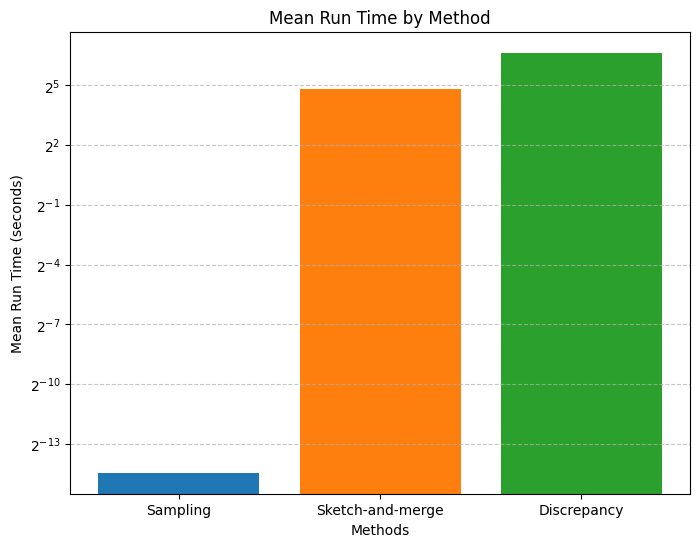

In [12]:
# Calculate the mean run time for each method
mean_times = [
    epsnet_sample["time"].mean(),
    epsnet_sketch["time"].mean(),
    epsnet_disc["time"].mean(),
]

# Define the methods
methods = ["Sampling", "Sketch-and-merge", "Discrepancy"]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(methods, mean_times, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add labels, title, and grid
plt.xlabel("Methods")
plt.ylabel("Mean Run Time (seconds)")
plt.title("Mean Run Time by Method")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale("log", base=2)
plt.show()


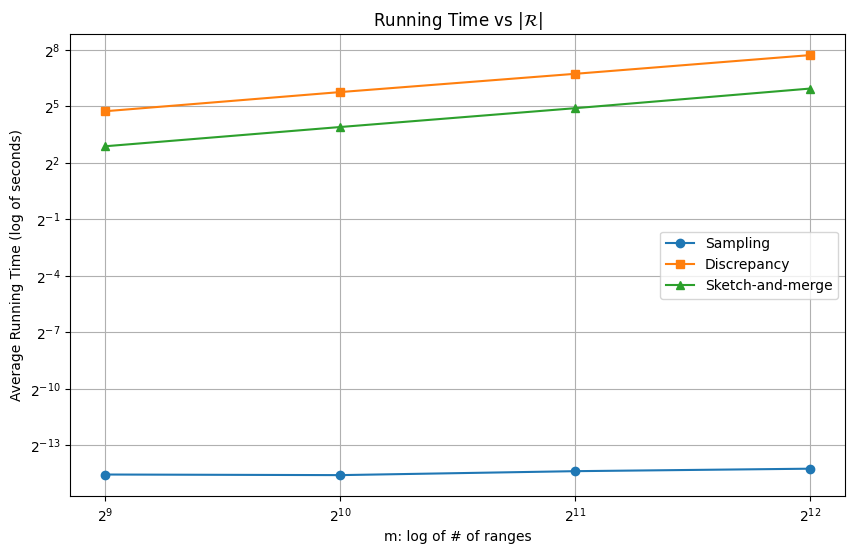

In [13]:
# Group by 'm' and calculate the mean running time for each method
sample_time_by_m = epsnet_sample.groupby("m")["time"].mean()
disc_time_by_m = epsnet_disc.groupby("m")["time"].mean()
sketch_time_by_m = epsnet_sketch.groupby("m")["time"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_time_by_m.index, sample_time_by_m.values, label="Sampling", marker='o')
plt.plot(disc_time_by_m.index, disc_time_by_m.values, label="Discrepancy", marker='s')
plt.plot(sketch_time_by_m.index, sketch_time_by_m.values, label="Sketch-and-merge", marker='^')

plt.xlabel("m: log of # of ranges")
plt.ylabel("Average Running Time (log of seconds)")
plt.title("Running Time vs $|\mathcal{R}|$")
plt.yscale("log", base=2)  # Set y-axis to log scale
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid()
plt.show()

## higher dims

In [15]:
epsnet_sample = pd.read_csv("./epsnet/standard/epsnet_sample_results_halfspace.csv")
epsnet_sketch = pd.read_csv("./epsnet/standard/epsnet_sketch_merge_results_halfspace.csv")

In [16]:
epsnet_sample["size"] = epsnet_sample["red_points"] + epsnet_sample["blue_points"]
epsnet_sketch["size"] = epsnet_sketch["red_points"] + epsnet_sketch["blue_points"]

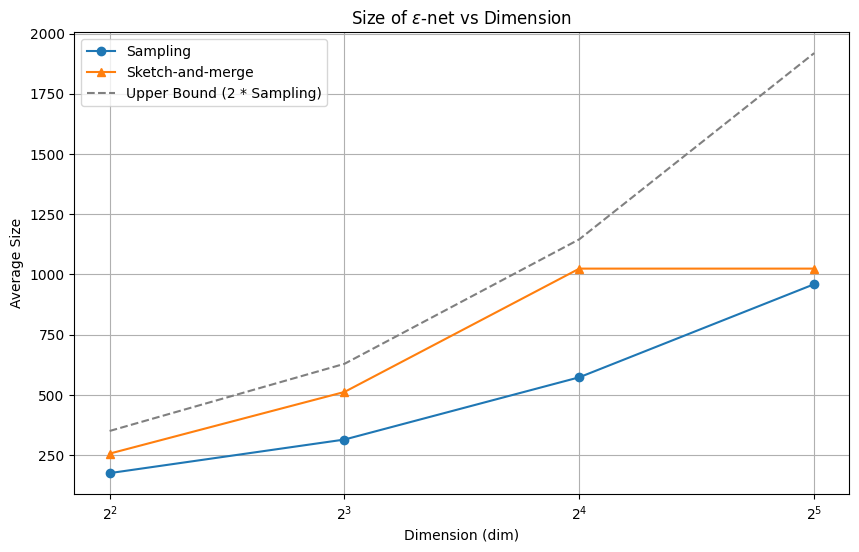

In [20]:
# Group by 'dim' and calculate the mean size for each method
sample_size_by_dim = epsnet_sample.groupby("dim")["size"].mean()
sketch_size_by_dim = epsnet_sketch.groupby("dim")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_size_by_dim.index, sample_size_by_dim.values, label="Sampling", marker='o')
plt.plot(sketch_size_by_dim.index, sketch_size_by_dim.values, label="Sketch-and-merge", marker='^')

# Add the upper bound line
plt.plot(sample_size_by_dim.index, 2 * sample_size_by_dim.values, label="Upper Bound (2 * Sampling)", linestyle='--', color='gray')

plt.xlabel("Dimension (dim)")
plt.ylabel("Average Size")
plt.title("Size of $\epsilon$-net vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

## Hittingset:

In [21]:
hittingset_rectangle = pd.read_csv("./hittingset/standard/hittingset_results_rectangle.csv")
hittingset_halfspace = pd.read_csv("./hittingset/standard/hittingset_results_halfspace.csv")

In [22]:
hittingset_rectangle["size"] = hittingset_rectangle["red_points"] + hittingset_rectangle["blue_points"]
hittingset_halfspace["size"] = hittingset_halfspace["red_points"] + hittingset_halfspace["blue_points"]

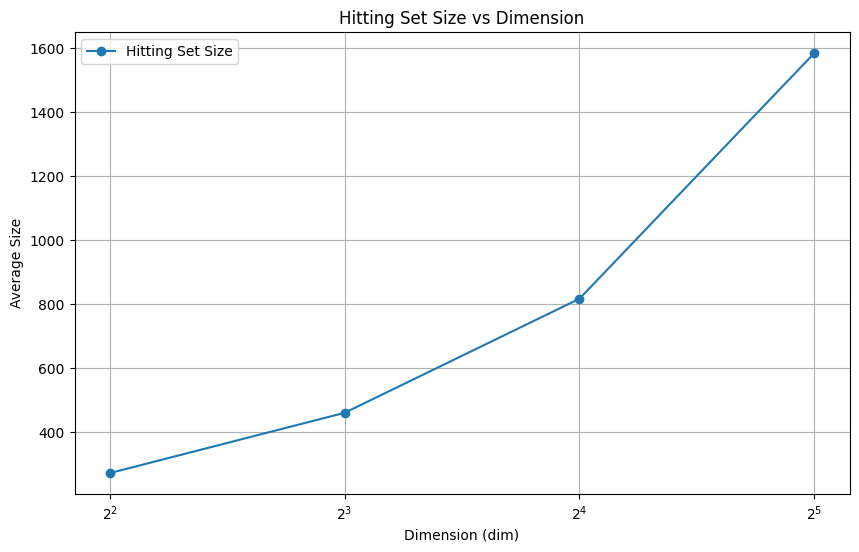

In [23]:
# Group by 'dim' and calculate the mean size for each dimension
hittingset_size_by_dim = hittingset_halfspace.groupby("dim")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hittingset_size_by_dim.index, hittingset_size_by_dim.values, label="Hitting Set Size", marker='o')

plt.xlabel("Dimension (dim)")
plt.ylabel("Average Size")
plt.title("Hitting Set Size vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

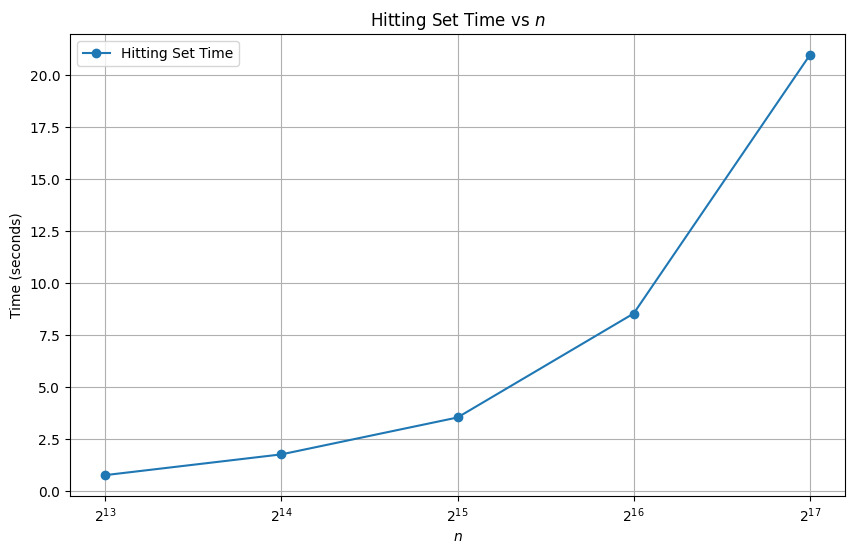

In [24]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hittingset_rectangle["n"], hittingset_rectangle["time"], label="Hitting Set Time", marker='o')

plt.xlabel("$n$")
plt.ylabel("Time (seconds)")
plt.title("Hitting Set Time vs $n$")
plt.xscale("log", base=2)  # Set x-axis to log scale
# plt.yscale("log")  # Set y-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

# Fair

## Rectangle

In [71]:
epsnet_sample = pd.read_csv("./epsnet/fair/dp_fair_epsnet_rectangle_sample.csv")
epsnet_sketch = pd.read_csv("./epsnet/fair/dp_fair_epsnet_rectangle_sketch_merge.csv")
epsnet_unfair = pd.read_csv("./epsnet/standard/epsnet_sample_results_rectangle.csv")
epsnet_unfair_sketch = pd.read_csv("./epsnet/standard/epsnet_sketch_merge_results_rectangle.csv")

In [72]:
epsnet_sample["size"] = epsnet_sample["red_points"] + epsnet_sample["blue_points"]
epsnet_unfair_sketch["size"] = epsnet_unfair_sketch["red_points"] + epsnet_unfair_sketch["blue_points"]
epsnet_sketch["size"] = epsnet_sketch["red_points"] + epsnet_sketch["blue_points"]
epsnet_unfair["size"] = epsnet_unfair["red_points"] + epsnet_unfair["blue_points"]

In [73]:
epsnet_sample["ratios"] = epsnet_sample["ratios"].apply(ast.literal_eval)
# epsnet_unfair_sketch["ratios"] = epsnet_unfair_sketch["ratios"].apply(ast.literal_eval)
epsnet_sketch["ratios"] = epsnet_sketch["ratios"].apply(ast.literal_eval)

In [74]:
epsnet_sample["counts"] = epsnet_sample["counts"].apply(ast.literal_eval)

In [75]:
filtered_epsnet_sample = epsnet_sample[epsnet_sample["ratios"].apply(lambda x: x == [0.5, 0.5])]

filtered_epsnet_sketch = epsnet_sketch[epsnet_sketch["ratios"].apply(lambda x: x == [0.5, 0.5])]

In [76]:
def l2_dist(v, u):
    v_normalized = v / np.linalg.norm(v)
    u_normalized = u / np.linalg.norm(u)

    # Calculate the L2 distance
    l2_distance = np.linalg.norm(v_normalized - u_normalized)
    return l2_distance / len(v)

def l_inf_dist(u, v):
    v_normalized = v / np.linalg.norm(v)
    u_normalized = u / np.linalg.norm(u)
    
    # calculate l_inf distance
    l_inf_distance = np.max(np.abs(v_normalized - u_normalized))
    return l_inf_distance

In [77]:
filtered_epsnet_sample["fairness_l2"] = filtered_epsnet_sample.apply(
    lambda row: l2_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
filtered_epsnet_sample["fairness_l_inf"] = filtered_epsnet_sample.apply(
    lambda row: l_inf_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

# filtered_epsnet_naive["fairness"] = filtered_epsnet_naive.apply(
#     lambda row: normal_distance(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
# )

filtered_epsnet_sketch["fairness_l2"] = filtered_epsnet_sketch.apply(
    lambda row: l2_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
filtered_epsnet_sketch["fairness_l_inf"] = filtered_epsnet_sketch.apply(
    lambda row: l_inf_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

epsnet_unfair["fairness_l2"] = epsnet_unfair.apply(
    lambda row: l2_dist(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
epsnet_unfair["fairness_l_inf"] = epsnet_unfair.apply(
    lambda row: l_inf_dist(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

/tmp/ipykernel_55899/456405248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_epsnet_sample["fairness_l2"] = filtered_epsnet_sample.apply(
/tmp/ipykernel_55899/456405248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_epsnet_sample["fairness_l_inf"] = filtered_epsnet_sample.apply(


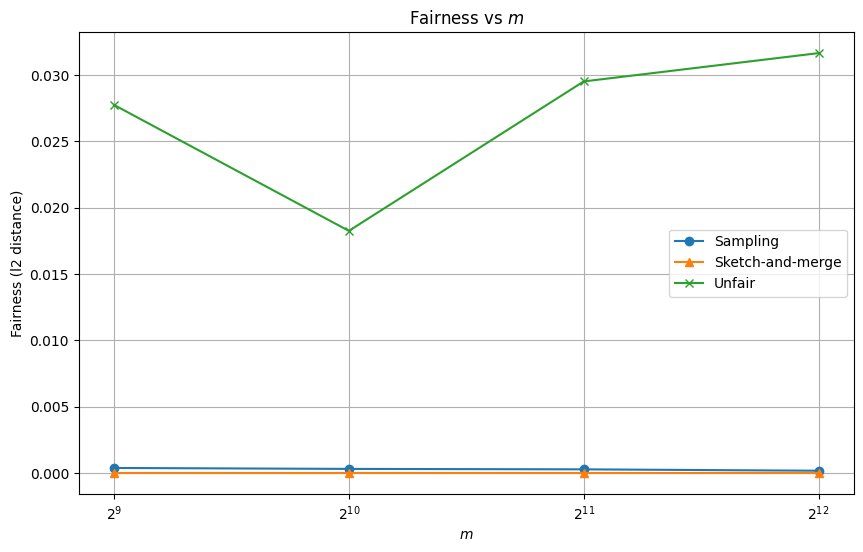

In [78]:
# Group by 'm' and calculate the mean fairness for each method
sample_fairness_by_m = filtered_epsnet_sample.groupby("m")["fairness_l2"].mean()
# naive_fairness_by_m = filtered_epsnet_naive.groupby("m")["fairness"].mean()
sketch_fairness_by_m = filtered_epsnet_sketch.groupby("m")["fairness_l2"].mean()
unfair_fairness_by_m = epsnet_unfair.groupby("m")["fairness_l2"].mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot fairness vs m for each dataset
plt.plot(sample_fairness_by_m.index, sample_fairness_by_m.values, label="Sampling", marker='o')
# plt.plot(naive_fairness_by_m.index, naive_fairness_by_m.values, label="Naive", marker='s')
plt.plot(sketch_fairness_by_m.index, sketch_fairness_by_m.values, label="Sketch-and-merge", marker='^')
plt.plot(unfair_fairness_by_m.index, unfair_fairness_by_m.values, label="Unfair", marker='x')

# Add labels, title, and legend
plt.xlabel("$m$")
plt.ylabel("Fairness (l2 distance)")
plt.title("Fairness vs $m$")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

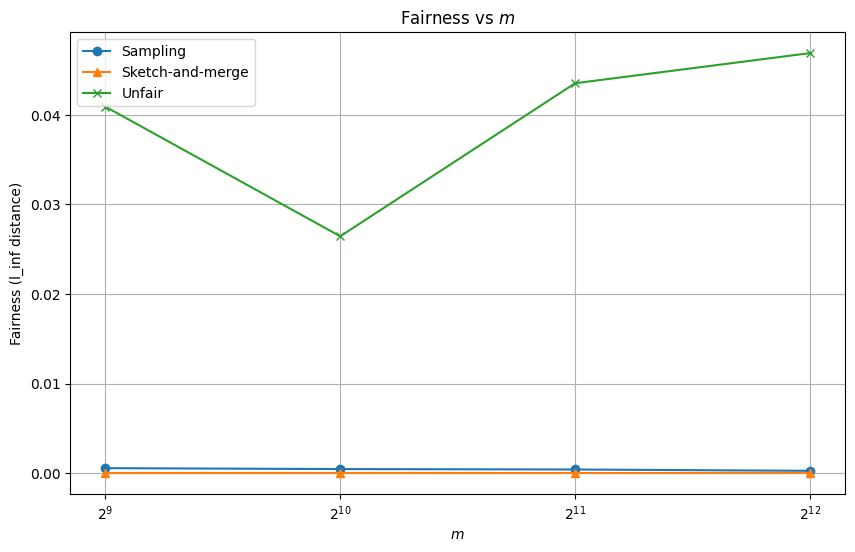

In [79]:
# Group by 'm' and calculate the mean fairness for each method
sample_fairness_by_m = filtered_epsnet_sample.groupby("m")["fairness_l_inf"].mean()
# naive_fairness_by_m = filtered_epsnet_naive.groupby("m")["fairness"].mean()
sketch_fairness_by_m = filtered_epsnet_sketch.groupby("m")["fairness_l_inf"].mean()
unfair_fairness_by_m = epsnet_unfair.groupby("m")["fairness_l_inf"].mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot fairness vs m for each dataset
plt.plot(sample_fairness_by_m.index, sample_fairness_by_m.values, label="Sampling", marker='o')
# plt.plot(naive_fairness_by_m.index, naive_fairness_by_m.values, label="Naive", marker='s')
plt.plot(sketch_fairness_by_m.index, sketch_fairness_by_m.values, label="Sketch-and-merge", marker='^')
plt.plot(unfair_fairness_by_m.index, unfair_fairness_by_m.values, label="Unfair", marker='x')

# Add labels, title, and legend
plt.xlabel("$m$")
plt.ylabel("Fairness (l_inf distance)")
plt.title("Fairness vs $m$")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

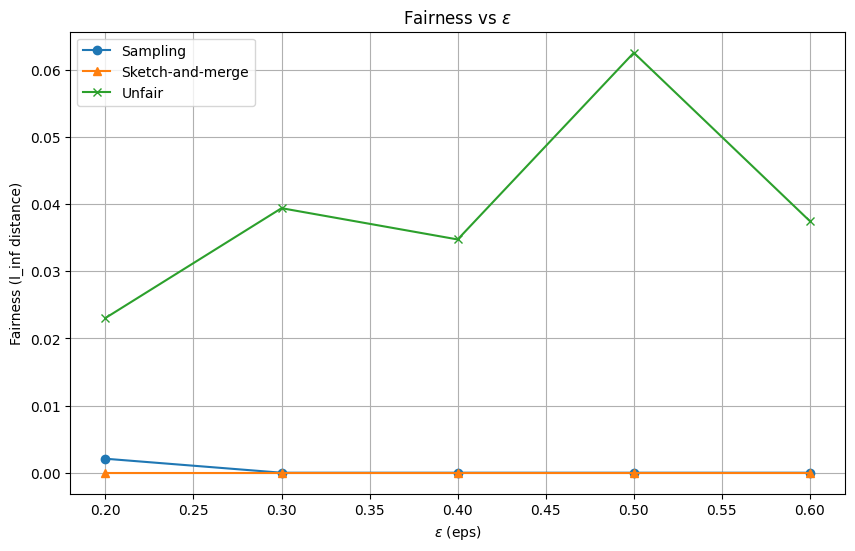

In [80]:
# Group by 'eps' and calculate the mean fairness for each method
sample_fairness_by_eps = filtered_epsnet_sample.groupby("eps")["fairness_l_inf"].mean()
# naive_fairness_by_eps = filtered_epsnet_naive.groupby("eps")["fairness"].mean()
sketch_fairness_by_eps = filtered_epsnet_sketch.groupby("eps")["fairness_l_inf"].mean()
unfair_fairness_by_eps = epsnet_unfair.groupby("eps")["fairness_l_inf"].mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot fairness vs eps for each dataset
plt.plot(sample_fairness_by_eps.index, sample_fairness_by_eps.values, label="Sampling", marker='o')
# plt.plot(naive_fairness_by_eps.index, naive_fairness_by_eps.values, label="Naive", marker='s')
plt.plot(sketch_fairness_by_eps.index, sketch_fairness_by_eps.values, label="Sketch-and-merge", marker='^')
plt.plot(unfair_fairness_by_eps.index, unfair_fairness_by_eps.values, label="Unfair", marker='x')

# Add labels, title, and legend
plt.xlabel("$\epsilon$ (eps)")
plt.ylabel("Fairness (l_inf distance)")
plt.title("Fairness vs $\epsilon$")
plt.legend()
plt.grid(True)
plt.show()

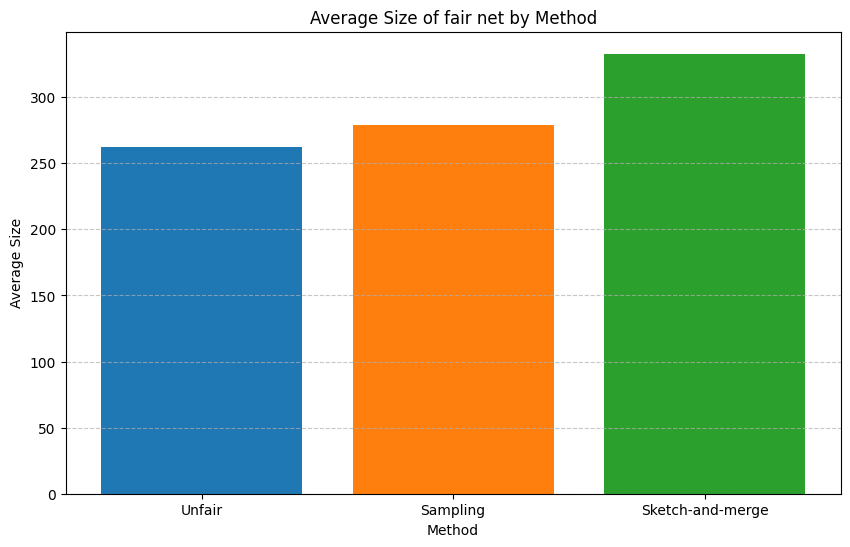

In [81]:
# Group by 'm' and calculate the mean size for each method
sample_size_by_m = epsnet_sample.groupby("m")["size"].mean()
# naive_size_by_m = epsnet_naive.groupby("m")["size"].mean()
sketch_size_by_m = epsnet_sketch.groupby("m")["size"].mean()
unfair_size_by_m = epsnet_unfair.groupby("m")["size"].mean()

# Group by 'm' and calculate the mean size for each method
methods = ["Unfair", "Sampling", "Sketch-and-merge"]
sizes = [
    unfair_size_by_m.mean(),
    sample_size_by_m.mean(),
    sketch_size_by_m.mean(),
    # naive_size_by_m.mean(),
]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(methods, sizes, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Using visually distinct colors

# Add labels, title, and legend
plt.xlabel("Method")
plt.ylabel("Average Size")
plt.title("Average Size of fair net by Method")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


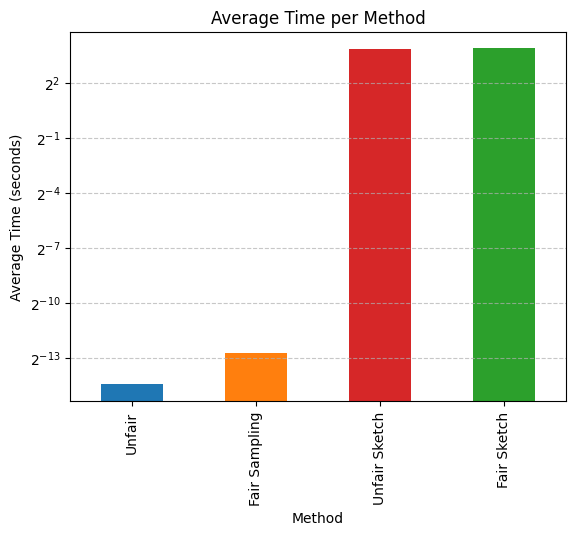

In [82]:
# Group by method and calculate the mean time for each method
methods = ["Unfair", "Fair Sampling", "Unfair Sketch", "Fair Sketch"]
times = [
    epsnet_unfair["time"].mean(),
    epsnet_sample["time"].mean(),
    epsnet_unfair_sketch["time"].mean(),
    epsnet_sketch["time"].mean(),
]

# Create a DataFrame for plotting
time_data = pd.DataFrame({"Method": methods, "Time": times})

# Plot the results
time_data.plot(x="Method", y="Time", kind="bar", color=['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c'], legend=False)

# Add labels, title, and grid
plt.xlabel("Method")
plt.ylabel("Average Time (seconds)")
plt.title("Average Time per Method")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale("log", base=2)  # Set y-axis to log scale
plt.show()

vs k

In [83]:
filtered_equal_sample = epsnet_sample[epsnet_sample["ratios"].apply(lambda x: len(set(x)) == 1)]
# filtered_equal_naive = epsnet_naive[epsnet_naive["ratios"].apply(lambda x: len(set(x)) == 1)]
filtered_equal_sketch = epsnet_sketch[epsnet_sketch["ratios"].apply(lambda x: len(set(x)) == 1)]

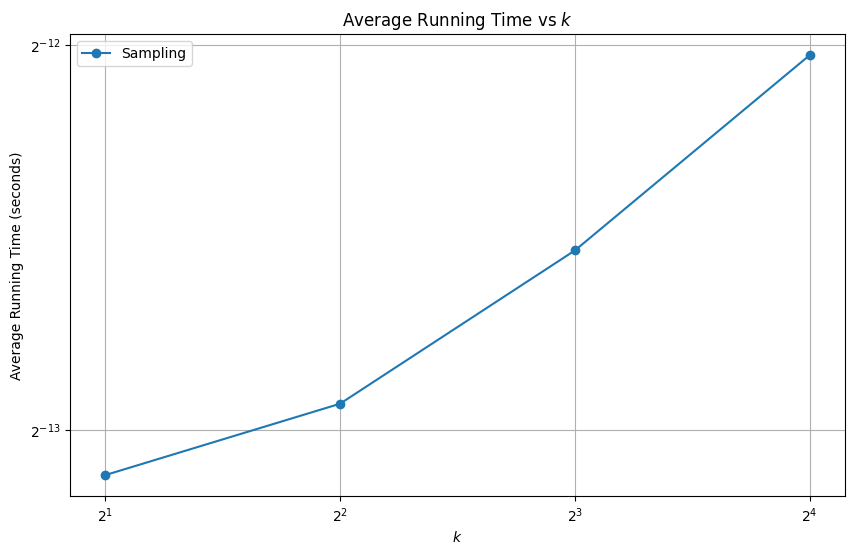

In [84]:
# Group by 'k' and calculate the mean running time for each method
sample_time_by_k = filtered_equal_sample.groupby("k")["time"].mean()
# naive_time_by_k = filtered_equal_naive.groupby("k")["time"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_time_by_k.index, sample_time_by_k.values, label="Sampling", marker='o')
# plt.plot(naive_time_by_k.index, naive_time_by_k.values, label="Naive", marker='s')

# Add labels, title, and legend
plt.xlabel("$k$")
plt.ylabel("Average Running Time (seconds)")
plt.title("Average Running Time vs $k$")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.yscale("log", base=2)  # Set y-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

BUG?

In [90]:
times_vs_k = pd.read_csv("./epsnet/fair/dp_fair_epsnet_sampling_size_vs_k.csv")

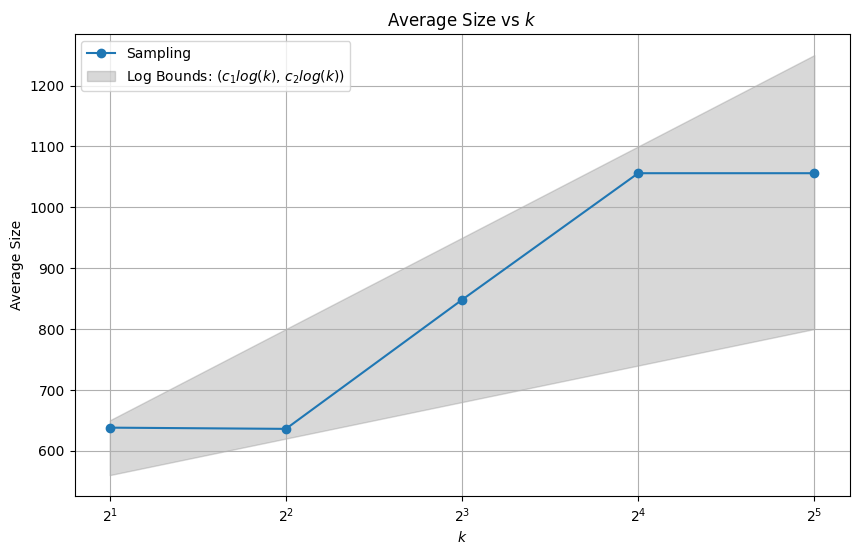

In [120]:
import math

# Define constants for the strip
c1, c2 = 60, 150

# Group by 'k' and calculate the mean size for each method
sample_size_by_k = times_vs_k.groupby("k")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_size_by_k.index, sample_size_by_k.values, label="Sampling", marker='o')

# Add the upper bound line
# upper_bound = [100 * math.log(k, 2) + 500 for k in sample_size_by_k.index]
# plt.plot(sample_size_by_k.index, upper_bound, label="Upper Bound (log(k))", linestyle='--', color='gray')

# Add the strip
k_values = sample_size_by_k.index
c1_values = [c1 * math.log(k, 2) + 500 for k in k_values]
c2_values = [c2 * math.log(k, 2) + 500 for k in k_values]
plt.fill_between(k_values, c1_values, c2_values, color='gray', alpha=0.3, label=f"Log Bounds: ($c_1 log(k)$, $c_2 log(k)$)")

# Add labels, title, and legend
plt.xlabel("$k$")
plt.ylabel("Average Size")
plt.title(f"Average Size vs $k$")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

## Halfspace

In [121]:
epsnet_sample = pd.read_csv("./epsnet/fair/dp_fair_epsnet_halfspace_sample.csv")
epsnet_sketch = pd.read_csv("./epsnet/fair/dp_fair_epsnet_halfspace_sketch_merge.csv")
epsnet_unfair = pd.read_csv("./epsnet/standard/epsnet_sample_results_halfspace.csv")

In [122]:
epsnet_sample["ratios"] = epsnet_sample["ratios"].apply(ast.literal_eval)
epsnet_sketch["ratios"] = epsnet_sketch["ratios"].apply(ast.literal_eval)

In [123]:
epsnet_sample["fairness_l2"] = epsnet_sample.apply(
    lambda row: l2_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
epsnet_sample["fairness_l_inf"] = epsnet_sample.apply(
    lambda row: l_inf_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

epsnet_sketch["fairness_l2"] = epsnet_sketch.apply(
    lambda row: l2_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
epsnet_sketch["fairness_l_inf"] = epsnet_sketch.apply(
    lambda row: l_inf_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

epsnet_unfair["fairness_l2"] = epsnet_unfair.apply(
    lambda row: l2_dist(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
epsnet_unfair["fairness_l_inf"] = epsnet_unfair.apply(
    lambda row: l_inf_dist(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

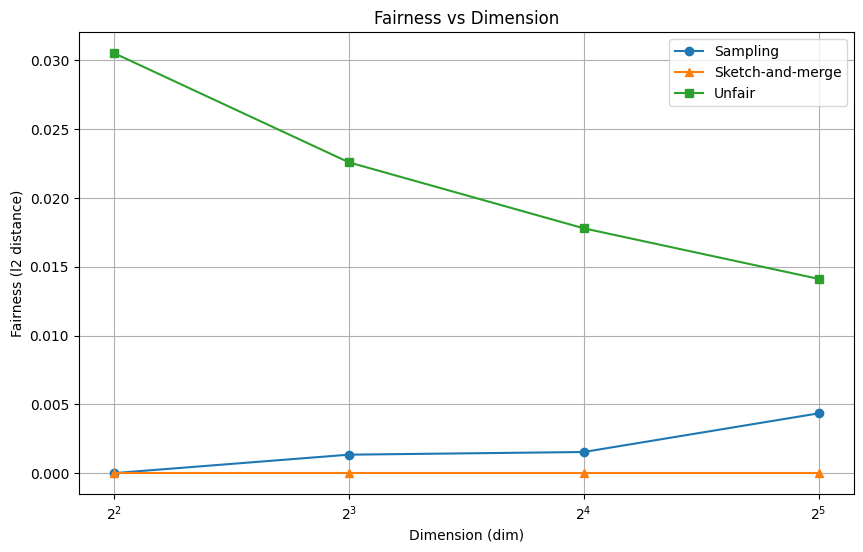

In [125]:
# Group by 'dim' and calculate the mean fairness for each method
sample_fairness_by_dim = epsnet_sample.groupby("dim")["fairness_l2"].mean()
sketch_fairness_by_dim = epsnet_sketch.groupby("dim")["fairness_l2"].mean()
unfair_fairness_by_dim = epsnet_unfair.groupby("dim")["fairness_l2"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_fairness_by_dim.index, sample_fairness_by_dim.values, label="Sampling", marker='o')
plt.plot(sketch_fairness_by_dim.index, sketch_fairness_by_dim.values, label="Sketch-and-merge", marker='^')
plt.plot(unfair_fairness_by_dim.index, unfair_fairness_by_dim.values, label="Unfair", marker='s')

# Add labels, title, and legend
plt.xlabel("Dimension (dim)")
plt.ylabel("Fairness (l2 distance)")
plt.title("Fairness vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

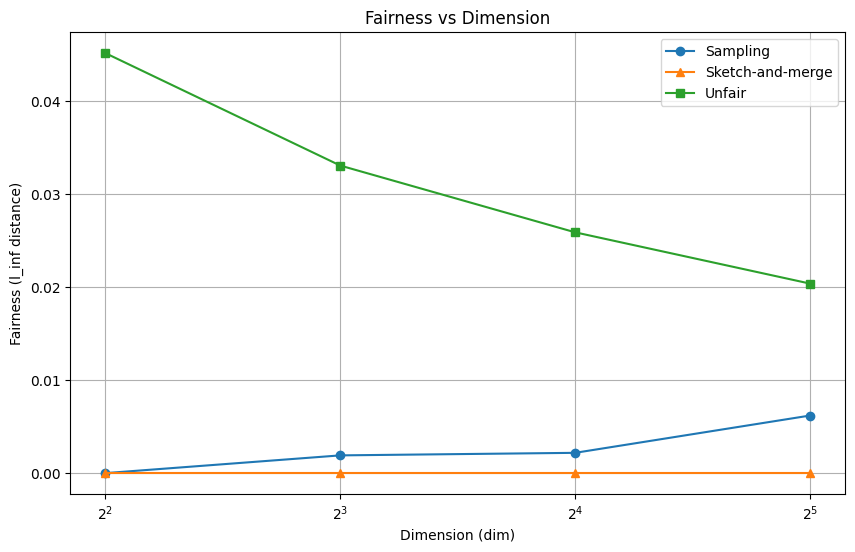

In [126]:
# Group by 'dim' and calculate the mean fairness for each method
sample_fairness_by_dim = epsnet_sample.groupby("dim")["fairness_l_inf"].mean()
sketch_fairness_by_dim = epsnet_sketch.groupby("dim")["fairness_l_inf"].mean()
unfair_fairness_by_dim = epsnet_unfair.groupby("dim")["fairness_l_inf"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_fairness_by_dim.index, sample_fairness_by_dim.values, label="Sampling", marker='o')
plt.plot(sketch_fairness_by_dim.index, sketch_fairness_by_dim.values, label="Sketch-and-merge", marker='^')
plt.plot(unfair_fairness_by_dim.index, unfair_fairness_by_dim.values, label="Unfair", marker='s')

# Add labels, title, and legend
plt.xlabel("Dimension (dim)")
plt.ylabel("Fairness (l_inf distance)")
plt.title("Fairness vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

## Fair HittingSet

In [127]:
fair_hittingset_rectangle = pd.read_csv("./hittingset/fair/fair_hitting_set_results_rectangle.csv")
fair_hittingset_halfspace = pd.read_csv("./hittingset/fair/fair_hitting_set_results_halfspace.csv")
unfair_hittingset_rectangle = pd.read_csv("./hittingset/standard/hittingset_results_rectangle.csv")
unfair_hittingset_halfspace = pd.read_csv("./hittingset/standard/hittingset_results_halfspace.csv")

In [128]:
# Convert the 'ratios' column from string to list
fair_hittingset_rectangle["ratios"] = fair_hittingset_rectangle["ratios"].apply(ast.literal_eval)
fair_hittingset_halfspace["ratios"] = fair_hittingset_halfspace["ratios"].apply(ast.literal_eval)

# Filter rows where 'ratios' is [50, 50]
fair_hittingset_rectangle = fair_hittingset_rectangle[
    fair_hittingset_rectangle["ratios"].apply(lambda x: x == [0.5, 0.5])
]
fair_hittingset_halfspace = fair_hittingset_halfspace[
    fair_hittingset_halfspace["ratios"].apply(lambda x: x == [0.5, 0.5])
]

In [129]:
fair_hittingset_rectangle["fairness_l2"] = fair_hittingset_rectangle["ratios"].apply(
    lambda ratios: l2_dist(np.array(ratios), np.array([0.5, 0.5]))
)
fair_hittingset_rectangle["fairness_l_inf"] = fair_hittingset_rectangle["ratios"].apply(
    lambda ratios: l_inf_dist(np.array(ratios), np.array([0.5, 0.5]))
)
fair_hittingset_halfspace["fairness_l2"] = fair_hittingset_halfspace["ratios"].apply(
    lambda ratios: l2_dist(np.array(ratios), np.array([0.5, 0.5]))
)
fair_hittingset_halfspace["fairness_l_inf"] = fair_hittingset_halfspace["ratios"].apply(
    lambda ratios: l_inf_dist(np.array(ratios), np.array([0.5, 0.5]))
)

In [130]:
unfair_hittingset_rectangle["fairness_l2"] = unfair_hittingset_rectangle.apply(
    lambda row: l2_dist(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
unfair_hittingset_halfspace["fairness_l2"] = unfair_hittingset_halfspace.apply(
    lambda row: l2_dist(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
unfair_hittingset_rectangle["fairness_l_inf"] = unfair_hittingset_rectangle.apply(
    lambda row: l_inf_dist(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
unfair_hittingset_halfspace["fairness_l_inf"] = unfair_hittingset_halfspace.apply(
    lambda row: l_inf_dist(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

In [139]:
fair_hittingset_rectangle["fairness_l2"].mean(), unfair_hittingset_rectangle["fairness_l2"].mean(), fair_hittingset_halfspace["fairness_l2"].mean(), unfair_hittingset_halfspace["fairness_l2"].mean(),

(np.float64(0.0),
 np.float64(0.06254799769695646),
 np.float64(0.0),
 np.float64(0.2862794991334835))

Here is the data represented in a table format:

| Method                  | Fairness (L2) | Fairness (L∞) |
|--------------------------|---------------|---------------|
| Fair Hitting Set (Rectangle) | 0.0           | 0.0           |
| Unfair Hitting Set (Rectangle) | 0.084708      | 0.129512      |
| Fair Hitting Set (Halfspace) | 0.0           | 0.0           |
| Unfair Hitting Set (Halfspace) | 0.150693      | 0.242792      |

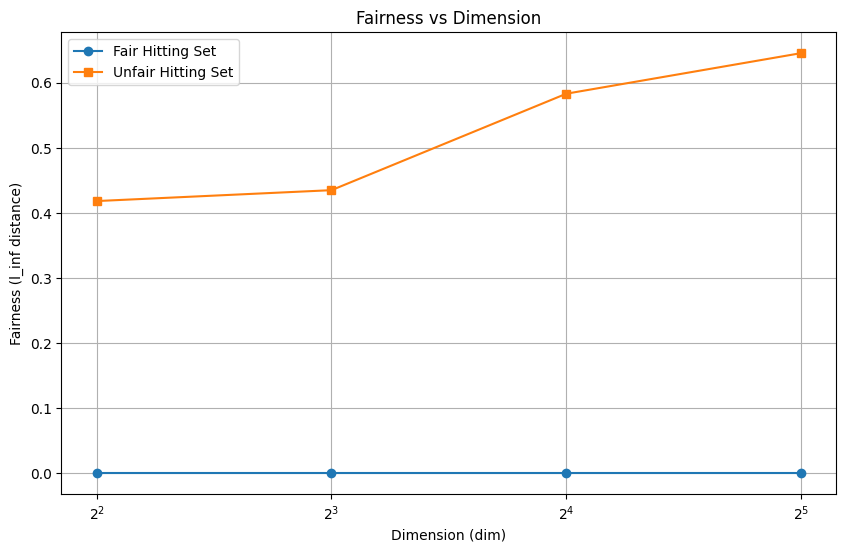

In [142]:
# Group by 'dim' and calculate the mean fairness for each dataset
fair_fairness_by_dim = fair_hittingset_halfspace.groupby("dim")["fairness_l_inf"].mean()
unfair_fairness_by_dim = unfair_hittingset_halfspace.groupby("dim")["fairness_l_inf"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(fair_fairness_by_dim.index, fair_fairness_by_dim.values, label="Fair Hitting Set", marker='o')
plt.plot(unfair_fairness_by_dim.index, unfair_fairness_by_dim.values, label="Unfair Hitting Set", marker='s')

# Add labels, title, and legend
plt.xlabel("Dimension (dim)")
plt.ylabel("Fairness (l_inf distance)")
plt.title("Fairness vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

In [143]:
fair_hittingset_rectangle["size"] = fair_hittingset_rectangle["red_points"] + fair_hittingset_rectangle["blue_points"]
fair_hittingset_halfspace["size"] = fair_hittingset_halfspace["red_points"] + fair_hittingset_halfspace["blue_points"]
unfair_hittingset_halfspace["size"] = unfair_hittingset_halfspace["red_points"] + unfair_hittingset_halfspace["blue_points"]
unfair_hittingset_rectangle["size"] = unfair_hittingset_rectangle["red_points"] + unfair_hittingset_rectangle["blue_points"]

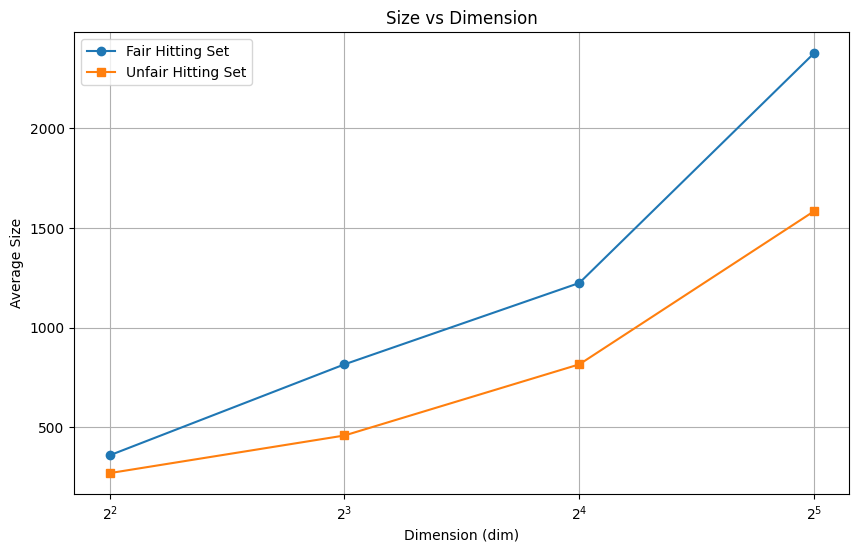

In [144]:
# Group by 'dim' and calculate the mean size for each dataset
fair_size_by_dim = fair_hittingset_halfspace.groupby("dim")["size"].mean()
unfair_size_by_dim = unfair_hittingset_halfspace.groupby("dim")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(fair_size_by_dim.index, fair_size_by_dim.values, label="Fair Hitting Set", marker='o')
plt.plot(unfair_size_by_dim.index, unfair_size_by_dim.values, label="Unfair Hitting Set", marker='s')

# Add labels, title, and legend
plt.xlabel("Dimension (dim)")
plt.ylabel("Average Size")
plt.title("Size vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

In [148]:
# Calculate the mean time for fair and unfair hitting sets
fair_hittingset_rectangle["time"].mean(), unfair_hittingset_rectangle["time"].mean(), fair_hittingset_halfspace["time"].mean(), unfair_hittingset_halfspace["time"].mean(), 

(np.float64(9.867637300491333),
 np.float64(7.10976619720459),
 np.float64(29.773400688171385),
 np.float64(20.220866394042968))

Here is the data converted into a table format:

| Dataset                  | Mean Time (seconds) |
|--------------------------|----------------------|
| Fair Hitting Set (Rectangle)         | 1.317548            |
| Unfair Hitting Set (Rectangle)       | 0.763424            |
| Fair Hitting Set (Halfspace) | 29.773400 |
| Unfair Hitting Set (Halfspace) | 20.220866 |

Size vs different distributions

In [159]:
fair_epsnet_sample = pd.read_csv("./epsnet/fair/dp_fair_epsnet_rectangle_sample.csv")
fair_hittingset = pd.read_csv("./hittingset/fair/fair_hitting_set_results_rectangle.csv")

In [160]:
# Convert the 'ratios' column from string to list
fair_hittingset["ratios"] = fair_hittingset["ratios"].apply(ast.literal_eval)

# Filter rows where the size of 'ratios' is not equal to 2
fair_hittingset = fair_hittingset[fair_hittingset["ratios"].apply(lambda x: len(x) == 2)]

# Convert the 'ratios' column from string to list
fair_epsnet_sample["ratios"] = fair_epsnet_sample["ratios"].apply(ast.literal_eval)

# Filter rows where the size of 'ratios' is not equal to 2
fair_epsnet_sample = fair_epsnet_sample[fair_epsnet_sample["ratios"].apply(lambda x: len(x) == 2)]

In [164]:
fair_hittingset["ratios_hash"] = fair_hittingset["ratios"].apply(lambda x: hash(tuple(x)))
fair_epsnet_sample["ratios_hash"] = fair_epsnet_sample["ratios"].apply(lambda x: hash(tuple(x)))

In [166]:
# Calculate fairness for fair_hittingset
fair_hittingset["fairness_l2"] = fair_hittingset.apply(
    lambda row: l2_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
fair_hittingset["fairness_l_inf"] = fair_hittingset.apply(
    lambda row: l_inf_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

# Calculate fairness for fair_epsnet_sample
fair_epsnet_sample["fairness_l2"] = fair_epsnet_sample.apply(
    lambda row: l2_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
fair_epsnet_sample["fairness_l_inf"] = fair_epsnet_sample.apply(
    lambda row: l_inf_dist(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

In [168]:
fair_hittingset["size"] = fair_hittingset["red_points"] + fair_hittingset["blue_points"]
fair_epsnet_sample["size"] = fair_epsnet_sample["red_points"] + fair_epsnet_sample["blue_points"]

In [179]:
fair_hittingset[["ratios_hash", "ratios"]][:4]

,ratios_hash,ratios
0,-6734751814816617151,"[0.5, 0.5]"
1,-5064239429027126527,"[0.6, 0.4]"
2,-4926950675639425068,"[0.7, 0.3]"
3,667457969020565238,"[0.8, 0.2]"


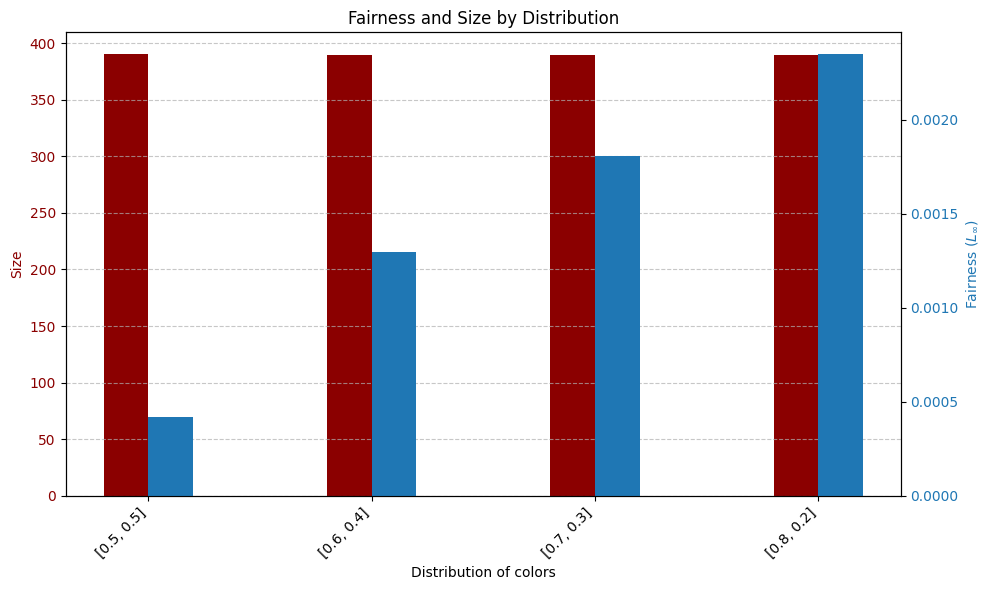

In [196]:
# Group by 'ratios' and calculate the mean size and fairness
grouped_fairness = fair_epsnet_sample.groupby("ratios_hash")["fairness_l_inf"].mean()
grouped_size = fair_epsnet_sample.groupby("ratios_hash")["size"].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot size as bars
bar_width = 0.2  # Reduced bar width for narrower bars
x = range(len(grouped_size))
ax1.bar(x, grouped_size.values, width=bar_width, color="#8B0000", label="Size")  # Dark red color
ax1.set_ylabel("Size", color="#8B0000")
ax1.tick_params(axis='y', labelcolor="#8B0000")

# Create a second y-axis for fairness
ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in x], grouped_fairness.values, width=bar_width, color="#1f77b4", label="Fairness")
ax2.set_ylabel("Fairness ($L_{\infty}$)", color="#1f77b4")
ax2.tick_params(axis='y', labelcolor="#1f77b4")

# Add labels, title, and legend
ax1.set_xlabel("Distribution of colors")
ax1.set_xticks([i + bar_width / 2 for i in x])
ax1.set_xticklabels(["[0.5, 0.5]", "[0.6, 0.4]", "[0.7, 0.3]", "[0.8, 0.2]"], rotation=45, ha="right")
plt.title("Fairness and Size by Distribution")

# Add grid
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()